# Gradient Descent

---

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The basic idea behind Gradient Descent is to iteratively tweak parameters to minimize a cost function. It measures the local gradient of the error function with regard to the parameter vector $\theta$ and goes in the direction of the descending gradient. Once the gradient is zero, we have reached a minimum.

---

## Cost Function

We initalize Gradient Descent by filling $\theta$ with random values. We improve it gradually by taking one step at a time, each step attempting to decrease the *cost function* until the algorithm converges to a minimum. In our case we will be using the Mean Squared Error, or MSE for implementation. The MSE equation is shown below:

$ MSE = \frac{1}{n} \sum_{i = 1}^{n}(Y_{i} - \hat{Y}_{i})^{2}$

---

## Learning Rate

---
An important parameter in the Gradient Descent algorithm is the step size, which is determined by the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm will have to complete many iterations to converge to a minimum and will negatively impact performance. Conversely, if the learning rate is too high, we might jump across the 'valley' of the equation and end up on the other side. This would cause the algorithm to diverge with larger and larger values; ultimately it would fail to find an optimal solution.

---

## Implementing Gradient Descent

---

To begin we need to compute the gradient of the cost function about each model parameter $\theta_{j}$ (e.g., we calculate how much the cost function will change if you change $\theta_{j}$ incrementally). We compute this by taking the partial derivative of the cost function. This equation is shown below:

$\frac{\partial}{\partial\theta_{j}}$ MSE($\theta) = \frac{2}{m} \sum_{i = 1}^{m}(\theta^{T}x^{(i)} - y^{(i)})x_{j}^{(i)} $

---

### Batch Gradient Descent

---

The gradient vector, $\nabla$MSE($\theta$), contains all the partial derivatives of the cost function. The formula, as seen below, calculates over the full training set **X** at each Gradient Descent. This method is called **Batch Gradient Descent** because it uses the whole batch of training data at each step. This makes this method quite slow on large datasets.

$\nabla\text{MSE}(\theta) = \frac{2}{m}X^{T}(X\theta - y)$

---

---

## Gradient Descent Step

Once we have the gradient vector, we move in the opposite direction to go downhill. This means we subtract $\nabla$MSE($\theta$) from $\theta$; this is where we implement the learning rate $\eta$ by multiplying the gradient vector by $\eta$ to determine the size of the next step. The equation is below:

$\theta^{\text{next step}} = \theta - \eta\nabla_{\theta}\text{MSE}(\theta)$

---

We will now implement our basic Batch Gradient Descent example. We begin by importing the necessary libraries.

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---

We will generate random data for this example, then we'll plot to visualize. We're generating data is $y = 5 + 4x + \text{noise}$.

---

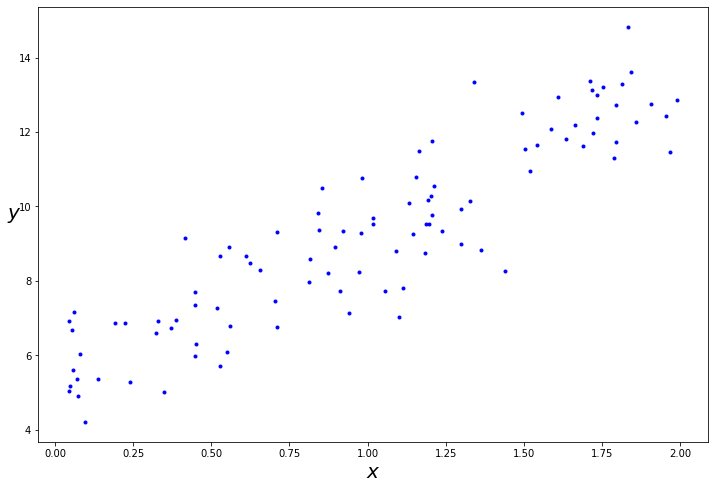

In [7]:
X = 2 * np.random.rand(100,1)
y = 5 + 4 * X+np.random.randn(100,1)

plt.figure(figsize = (12, 8))
plt.plot(X, y, 'b.')
plt.xlabel('$x$', 
           fontsize=20)
plt.ylabel('$y$', 
           rotation=0, 
           fontsize = 20)
plt.show()

--- 

We can now view a basic implementation of the Gradient Descent algorithm. We'll initialize $\eta$ at 0.01 and start with a random $\theta$.

---

In [25]:
eta = 0.1
n_iterations = 1000
theta = np.random.randn(2,1)
m = 100

X_b = np.c_[np.ones((100, 1)), X]

for i in range(iterations):
    grads = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * grads

---

Let's view our predicted theta:

---

In [26]:
print(theta)

[[5.28901951]
 [3.97312003]]


---

That is *very* close to our original distribution of $y = 5 + 4x$ if we account for noise. Let's plot the data with a predicted $\theta$. 

---

In [29]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), new_X]
y_predict = X_new_b.dot(theta)
y_predict

array([[ 5.28901951],
       [13.23525957]])

---

Let's visualize our Batch Gradient Descent algorithm in action.

---

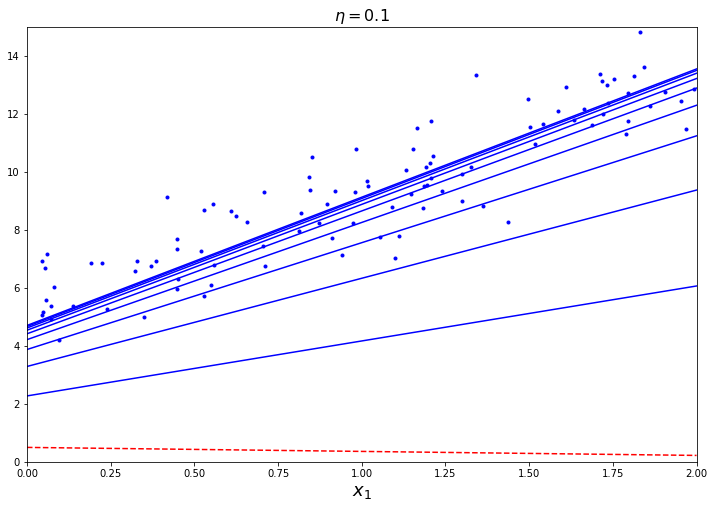

In [34]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=20)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
plt.figure(figsize=(12,8))
plt.ylabel("$y$", rotation=0, fontsize=20)
plt.plot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

---

From the plot above we can see that our theta converged in the middle of the data and didn't require too many iterations to converge to the optimal solution.

---